<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/07-Machine%20Learning/Linear_Discriminant_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.analyticsvidhya.com/blog/2021/08/a-brief-introduction-to-linear-discriminant-analysis/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
from sklearn.datasets import load_wine
dt = load_wine()
X = dt.data
y = dt.target

In [3]:
lda = LinearDiscriminantAnalysis()
lda_t = lda.fit_transform(X,y)

In [4]:
lda.explained_variance_ratio_

array([0.68747889, 0.31252111])

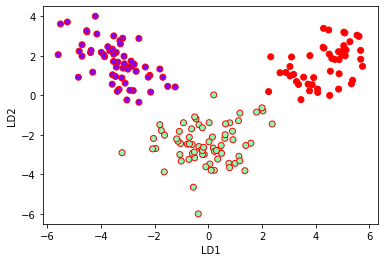

In [5]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(lda_t[:,0],lda_t[:,1],c=y,cmap='rainbow',edgecolors='r')

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [7]:
y_pred = lda.predict(X_test)
print(accuracy_score(y_test,y_pred))

1.0


In [8]:
confusion_matrix(y_test,y_pred)

array([[27,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 12]])

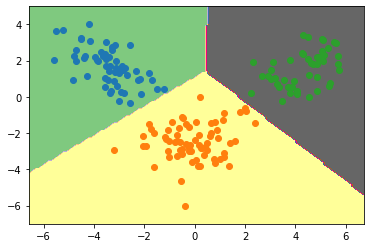

In [9]:
min1,max1 = lda_t[:,0].min()-1, lda_t[:,0].max()+1
min2,max2 = lda_t[:,1].min()-1,lda_t[:,1].max()+1
x1grid = np.arange(min1,max1,0.1)
x2grid = np.arange(min2,max2,0.1)
xx,yy = np.meshgrid(x1grid,x2grid)
r1,r2 = xx.flatten(),yy.flatten()
r1,r2 = r1.reshape((len(r1),1)), r2.reshape((len(r2),1))
grid = np.hstack((r1,r2))

model = LinearDiscriminantAnalysis()
model.fit(lda_t,y)
yhat = model.predict(grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx,yy,zz,cmap='Accent')

for class_value in range(3):
  row_ix = np.where( y== class_value)
  plt.scatter(lda_t[row_ix,0],lda_t[row_ix,1])